**DATA ANALYSIS - BLINKIT PROJECT**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv(r"D:\Data Science\Blinkit Project\blinkit_data.csv")

In [6]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower()

In [15]:
df.columns = df.columns.str.replace(' ', '_')

In [16]:
df.head(5)

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [17]:
df.shape

(8523, 12)

In [18]:
df.dtypes

item_fat_content              object
item_identifier               object
item_type                     object
outlet_establishment_year      int64
outlet_identifier             object
outlet_location_type          object
outlet_size                   object
outlet_type                   object
item_visibility              float64
item_weight                  float64
sales                        float64
rating                       float64
dtype: object

### **DATA CLEANING**

In [21]:
print(df['item_fat_content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [23]:
df['item_fat_content']= df['item_fat_content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

In [25]:
print(df['item_fat_content'].unique())

['Regular' 'Low Fat']


### **BUSINESS REQUIREMENTS**

In [37]:
#Total Sales
total_sales = df['sales'].sum()

#Average Sales
avg_sales = df['sales'].mean()

#NO of items sold
np_of_items_sold = df['sales'].count()

#Average Ratings
avg_ratings = df['rating'].mean()


#Display

print(f"Total Sales: ${total_sales:,.1F}")
print(f"Average Sales: ${avg_sales:,.0F}")
print(f"Items Sales: ${np_of_items_sold:,.0F}")
print(f"Average Ratings: ${avg_ratings:,.1F}")

Total Sales: $1,201,681.5
Average Sales: $141
Items Sales: $8,523
Average Ratings: $4.0


### **CHARTS REUIREMENT**

#### **Total Sales by Fat Content**

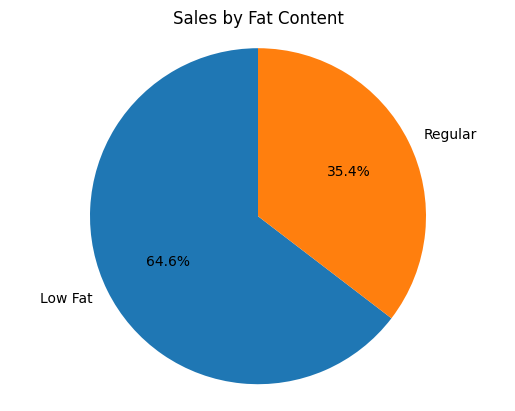

In [41]:
sales_by_fat = df.groupby('item_fat_content')['sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### **Total Sales by Item Type**

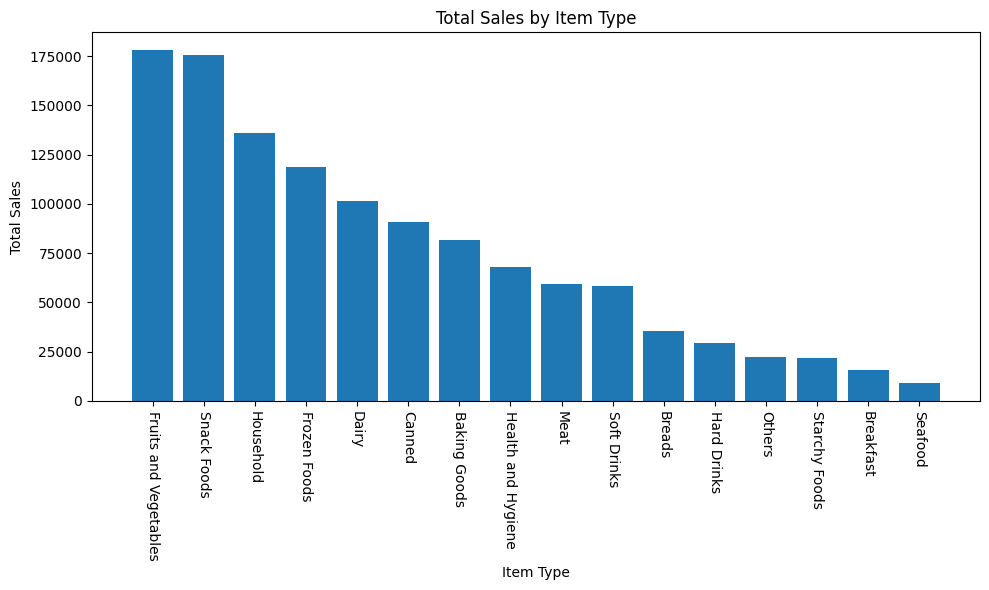

In [48]:

sales_by_type = df.groupby('item_type')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize= (10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Total Sales**

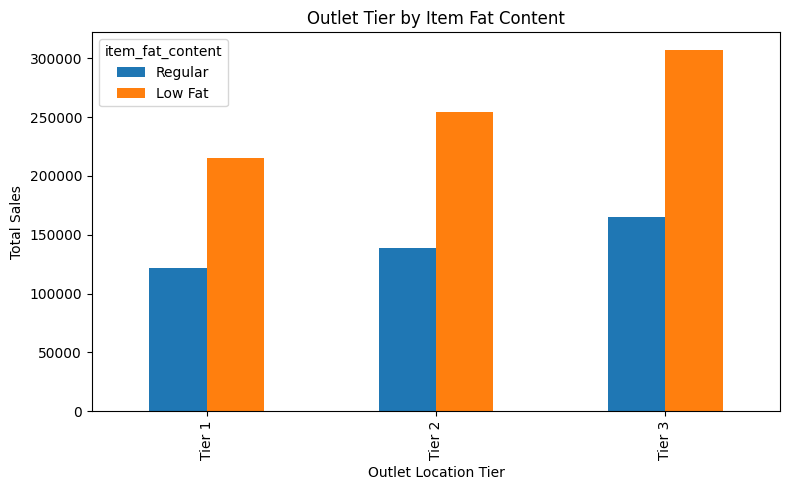

In [56]:
grouped = df.groupby(['outlet_location_type', 'item_fat_content'])['sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax= grouped.plot(kind = 'bar', figsize = (8,5), title= 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'item_fat_content')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

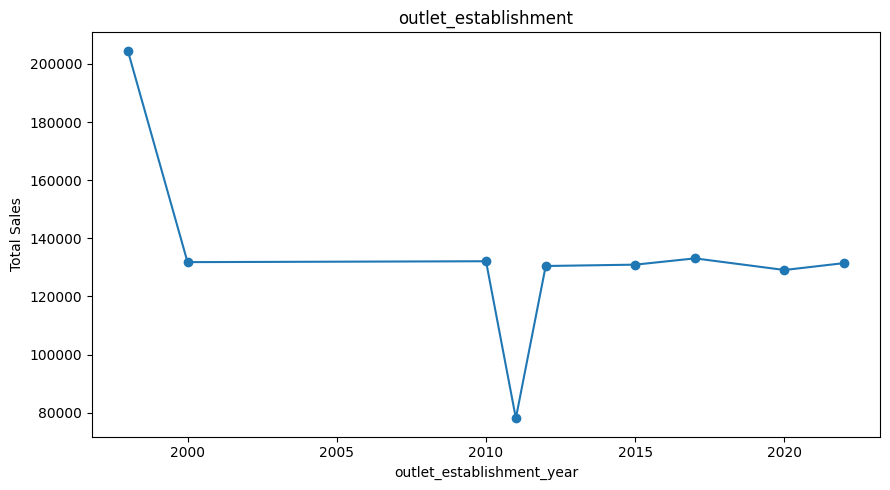

In [59]:
sales_by_year = df.groupby('outlet_establishment_year')['sales'].sum().sort_index()

plt.figure(figsize= (9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker= 'o', linestyle= '-')

plt.xlabel('outlet_establishment_year')
plt.ylabel('Total Sales')
plt.title('outlet_establishment')

plt.tight_layout()
plt.show()

#### **Sales by Outlet Size**

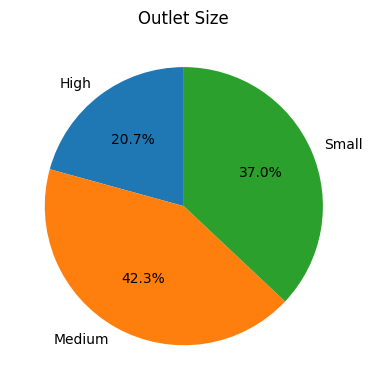

In [64]:
sales_by_size = df.groupby('outlet_size')['sales'].sum()

plt.figure(figsize= (4, 4))
plt.pie(sales_by_size, labels= sales_by_size.index,
                        autopct = '%1.1f%%', 
                        startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()
           

#### **Sales by Outlet Location**


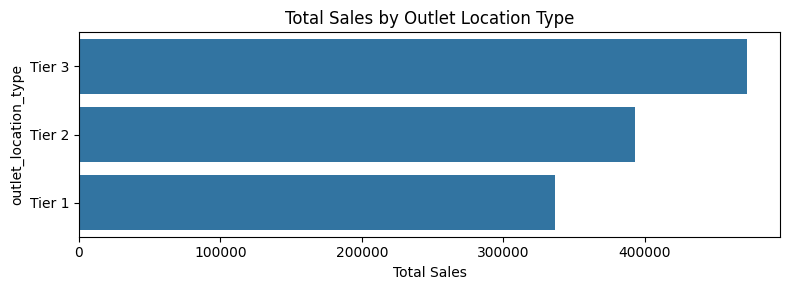

In [66]:
sales_by_location = df.groupby('outlet_location_type')['sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('sales', ascending = False)

plt.figure(figsize= (8, 3))
ax = sb.barplot(x='sales', y = 'outlet_location_type', data = sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('outlet_location_type')

plt.tight_layout()
plt.show()

In [60]:
df.columns

Index(['item_fat_content', 'item_identifier', 'item_type',
       'outlet_establishment_year', 'outlet_identifier',
       'outlet_location_type', 'outlet_size', 'outlet_type', 'item_visibility',
       'item_weight', 'sales', 'rating'],
      dtype='object')